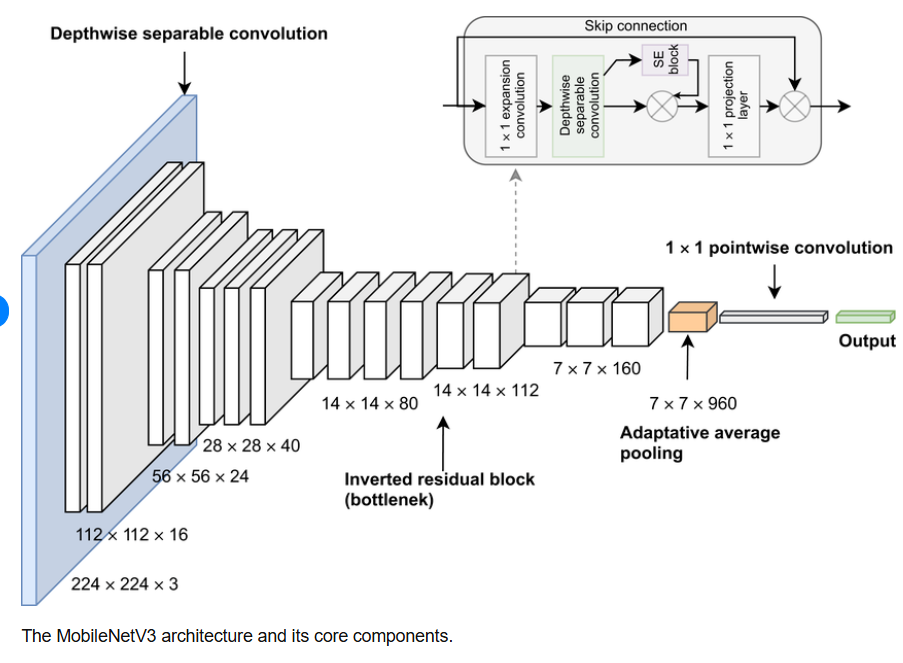

## What is MobileNetV3?

MobileNetV3 is a **lightweight convolutional neural network architecture** designed specifically for efficient use on mobile and embedded devices. It balances accuracy and computational efficiency, making it suitable for tasks like image classification, object detection, and semantic segmentation on resource-constrained hardware such as smartphones.

MobileNetV3 improves upon its predecessors (MobileNetV1 and V2) by combining **hardware-aware neural architecture search (NAS)** with novel architectural components tailored for mobile CPUs[1][2].

---

## Key Features of MobileNetV3

- **Two variants:**  
  - **MobileNetV3-Large**: For higher accuracy and more computational resources.  
  - **MobileNetV3-Small**: For low-resource scenarios with reduced complexity.

- **Hardware-aware NAS:** The architecture is optimized using automated search techniques considering mobile hardware constraints.

- **Novel components:**  
  - **Hard-Swish activation:** A computationally efficient alternative to the Swish activation function.  
  - **Squeeze-and-Excitation (SE) modules:** Improve channel-wise feature recalibration inside blocks.  
  - **Inverted Residual Blocks:** Efficient building blocks with skip connections and depthwise separable convolutions.

- **Efficient design:** Uses depthwise separable convolutions to reduce computation compared to traditional convolutions.

---

## MobileNetV3 Architecture Overview

MobileNetV3 builds on the MobileNetV2 architecture with several improvements:

### Main Building Block: Modified Inverted Residual Block

- **Expansion:** The input channels are expanded by a factor (e.g., 6x) using a pointwise (1x1) convolution.
- **Depthwise Convolution:** Applies a lightweight spatial convolution independently on each channel.
- **Squeeze-and-Excitation (SE) module:** Optional block that adaptively recalibrates channel-wise features.
- **Projection:** Reduces the expanded channels back to a smaller number via another pointwise convolution.
- **Skip connection:** Added if input and output shapes match, similar to ResNet.

### Activation Functions

- Uses **Hard-Swish** activation instead of ReLU or Swish for better efficiency on mobile hardware.

### Network Structure

- Starts with a standard convolutional layer.
- Stacks multiple modified inverted residual blocks with varying kernel sizes and expansion ratios.
- Ends with a convolutional layer, global average pooling, dropout, and a fully connected layer for classification.

---

## How is MobileNetV3 Different from Traditional CNNs?

| Aspect                  | Traditional CNNs                          | MobileNetV3                                   |
|-------------------------|-----------------------------------------|-----------------------------------------------|
| **Convolution type**    | Standard convolutions (heavy compute)   | Depthwise separable convolutions (efficient) |
| **Block design**        | Simple convolution + activation layers  | Inverted residual blocks with expansion and projection |
| **Activation**          | ReLU or others                          | Hard-Swish (efficient variant of Swish)       |
| **Channel attention**   | Usually none                            | Squeeze-and-Excitation modules included       |
| **Architecture search** | Manually designed                       | Hardware-aware neural architecture search (NAS) |
| **Target platform**     | General-purpose GPUs/CPUs               | Mobile and embedded devices optimized          |
| **Model size & speed**  | Larger, slower                         | Smaller, faster with competitive accuracy      |

---

## Simple Example to Illustrate the Difference

**Traditional CNN:**  
A typical CNN layer might do a 3x3 convolution on all input channels simultaneously, which is computationally expensive.

**MobileNetV3:**  
Instead, it first expands the channels with a 1x1 convolution, then applies a 3x3 depthwise convolution separately on each channel (much cheaper), then projects back to fewer channels. It also uses the hard-swish activation and SE modules to improve accuracy without adding much cost.

---

## Summary

- MobileNetV3 is a **mobile-optimized CNN** architecture combining NAS and efficient design.
- It uses **inverted residual blocks with depthwise convolutions**, **hard-swish activation**, and **SE modules**.
- It achieves a good trade-off between **accuracy and efficiency**, making it suitable for mobile devices.
- Different from traditional CNNs by focusing on **lightweight operations and hardware-aware optimization**.

---

## References

- [MobileNetV3 on Papers With Code](https://paperswithcode.com/method/mobilenetv3)  
- [MobileNetV3 Explained - Activeloop](https://www.activeloop.ai/resources/glossary/mobile-net-v-3/)  
- [Visual Deep Dive into MobileNetV3](https://francescopochetti.com/a-visual-deep-dive-into-the-building-blocks-of-mobilenetv3/)  
- [TorchVision MobileNetV3 Implementation](https://pytorch.org/blog/torchvision-mobilenet-v3-implementation/)  

---

This explanation covers MobileNetV3’s architecture and how it differs from traditional CNNs in a simple, intuitive way.

Citations:
[1] https://paperswithcode.com/method/mobilenetv3
[2] https://www.activeloop.ai/resources/glossary/mobile-net-v-3/
[3] https://francescopochetti.com/a-visual-deep-dive-into-the-building-blocks-of-mobilenetv3/
[4] https://pytorch.org/blog/torchvision-mobilenet-v3-implementation/
[5] https://www.youtube.com/watch?v=O7mQpJnB-cw

---
Answer from Perplexity: pplx.ai/share

In [1]:
import torch
import torchvision.models as models

# Load MobileNetV3-Large pretrained on ImageNet
mobilenet_v3_large = models.mobilenet_v3_large(pretrained=True)

# Load MobileNetV3-Small pretrained on ImageNet
mobilenet_v3_small = models.mobilenet_v3_small(pretrained=True)

c:\Users\LOQ\anaconda3\envs\pythonenv\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\LOQ\anaconda3\envs\pythonenv\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V3_Large_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V3_Large_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/mobilenet_v3_large-8738ca79.pth" to C:\Users\LOQ/.cache\torch\hub\checkpoints\mobilenet_v3_large-8738ca79.pth
100%|██████████| 21.1M/21.1M [00:36<00:00, 611kB/s] 
c:\Users\LOQ\anaconda3\envs\pythonenv\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments

In [2]:
import torch.nn as nn
# Modify the final layer for a custom number of classes (e.g., 10)
mobilenet_v3_large.classifier[3] = nn.Linear(in_features=1280, out_features=9)



In [3]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

# Define data transformations
transform = transforms.Compose([
    transforms.Resize((256, 256)),      
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])


# Load dataset
# train_dataset = datasets.ImageFolder(root='D:\Group50\Facial_Emotion_Recongnition\Datasets\Preprpcess_Large_Dataset\Preprpcess_Large_Dataset', transform=transform)
# train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True,num_workers=4,pin_memory=True )

dataset_path = r'D:\RuhunaNew\Academic\Research\Facial_Recog_Repo\Group_50_Repo\Datasets\Dataset_48_48_5000_per_each'
full_dataset = datasets.ImageFolder(root=dataset_path, transform=transform)
train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size


train_dataset, val_dataset = random_split(
    full_dataset,
    [train_size, val_size],
    generator=torch.Generator().manual_seed(42)
)


In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms, datasets
from torch.utils.data import DataLoader
from tqdm import tqdm  # Import tqdm for progress bar
import os
import torch
torch.cuda.empty_cache()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Parallel GPU support
if torch.cuda.device_count() > 1:
    print(f"🚀 Using {torch.cuda.device_count()} GPUs!")
    mobilenet_v3_large = nn.DataParallel(mobilenet_v3_large)

mobilenet_v3_large = mobilenet_v3_large.to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(mobilenet_v3_large.parameters(), lr=0.001)
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=0, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=0, pin_memory=True)


# Training with validation
# Training with validation
num_epochs = 13
for epoch in range(num_epochs):
    mobilenet_v3_large.train()
    running_loss = 0.0

    # Training loop
    train_progress = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}", leave=True, dynamic_ncols=True)
    for inputs, labels in train_progress:
        inputs, labels = inputs.to(device, non_blocking=True), labels.to(device, non_blocking=True)

        optimizer.zero_grad()
        outputs = mobilenet_v3_large(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        train_progress.set_postfix({"Loss": f"{loss.item():.4f}"})

    # Compute average training loss
    epoch_loss = running_loss / len(train_loader)

    # Validation loop
    mobilenet_v3_large.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for val_inputs, val_labels in val_loader:
            val_inputs, val_labels = val_inputs.to(device), val_labels.to(device)
            val_outputs = mobilenet_v3_large(val_inputs)
            _, predicted = torch.max(val_outputs, 1)
            total += val_labels.size(0)
            correct += (predicted == val_labels).sum().item()

    val_accuracy = 100 * correct / total
    print(f"\nEpoch {epoch+1}/{num_epochs} | Train Loss: {epoch_loss:.4f} | Validation Accuracy: {val_accuracy:.2f}%")


Epoch 1/13: 100%|██████████| 1125/1125 [03:55<00:00,  4.78it/s, Loss=1.0361]



Epoch 1/13 | Train Loss: 1.2481 | Validation Accuracy: 58.13%


Epoch 2/13: 100%|██████████| 1125/1125 [02:59<00:00,  6.25it/s, Loss=0.8914]



Epoch 2/13 | Train Loss: 1.0067 | Validation Accuracy: 59.72%


Epoch 3/13: 100%|██████████| 1125/1125 [02:48<00:00,  6.69it/s, Loss=0.8241]



Epoch 3/13 | Train Loss: 0.9101 | Validation Accuracy: 61.33%


Epoch 4/13: 100%|██████████| 1125/1125 [02:50<00:00,  6.60it/s, Loss=0.9584]



Epoch 4/13 | Train Loss: 0.8169 | Validation Accuracy: 59.44%


Epoch 5/13: 100%|██████████| 1125/1125 [02:47<00:00,  6.73it/s, Loss=0.8664]



Epoch 5/13 | Train Loss: 0.7374 | Validation Accuracy: 65.32%


Epoch 6/13: 100%|██████████| 1125/1125 [02:58<00:00,  6.32it/s, Loss=0.5073]



Epoch 6/13 | Train Loss: 0.6377 | Validation Accuracy: 64.30%


Epoch 7/13: 100%|██████████| 1125/1125 [02:46<00:00,  6.75it/s, Loss=0.6999]



Epoch 7/13 | Train Loss: 0.5582 | Validation Accuracy: 64.02%


Epoch 8/13: 100%|██████████| 1125/1125 [03:11<00:00,  5.88it/s, Loss=0.3691]



Epoch 8/13 | Train Loss: 0.4729 | Validation Accuracy: 64.53%


Epoch 9/13: 100%|██████████| 1125/1125 [02:48<00:00,  6.67it/s, Loss=0.5376]



Epoch 9/13 | Train Loss: 0.3955 | Validation Accuracy: 65.42%


Epoch 10/13: 100%|██████████| 1125/1125 [02:47<00:00,  6.70it/s, Loss=0.6552]



Epoch 10/13 | Train Loss: 0.3410 | Validation Accuracy: 62.66%


Epoch 11/13: 100%|██████████| 1125/1125 [02:47<00:00,  6.71it/s, Loss=0.2655]



Epoch 11/13 | Train Loss: 0.2900 | Validation Accuracy: 66.33%


Epoch 12/13: 100%|██████████| 1125/1125 [02:47<00:00,  6.72it/s, Loss=0.2074]



Epoch 12/13 | Train Loss: 0.2592 | Validation Accuracy: 65.61%


Epoch 13/13: 100%|██████████| 1125/1125 [02:51<00:00,  6.56it/s, Loss=0.0817]



Epoch 13/13 | Train Loss: 0.2261 | Validation Accuracy: 65.47%


In [5]:
# Save the model
torch.save(mobilenet_v3_large.state_dict(), 'mobilenet_v3_large_48x48_5000.pth')

In [ ]:
# Finalized CNN with better accuracy

import torch
import torch.nn as nn
import torchvision.transforms as transforms
import cv2
import numpy as np
import torchvision.models as models
from PIL import Image

# Device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Class labels (update to match your dataset folder order)
class_labels = ['Angry', 'Boring', 'Disgust', 'Fear', 'Happy', 'Neural', 'Sad', 'Stress', 'Suprise']

# Initialize the model with the same architecture as when trained
model = models.mobilenet_v3_large(pretrained=False)  # Don't load pretrained weights
num_classes = 9  # Update to match your class count
model.classifier[3] = nn.Linear(model.classifier[3].in_features, num_classes)  # Modify last layer

# Now load the state_dict
model.load_state_dict(torch.load("D:\RuhunaNew\Academic\Research\Facial_Recog\Group_50\Models\mobilenet_v3_large_finetuned_256px.pth", map_location=device))
model = model.to(device)
model.eval()

# Preprocessing for webcam frames
transform = transforms.Compose([
    transforms.Resize((224, 224)),      
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Load Haar Cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

cap = cv2.VideoCapture(0)
print("Press 'q' to quit.")
import time

last_prediction_time = 0
prediction_interval = 2  # seconds
last_labels = []

while True:
    ret, frame = cap.read()
    if not ret:
        break
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)
    current_time = time.time()
    if current_time - last_prediction_time >= prediction_interval:
        last_labels = []
        for (x, y, w, h) in faces:
            face = gray[y:y+h, x:x+w]
            face_resized = cv2.resize(face, (64, 64))
            face_pil = Image.fromarray(cv2.cvtColor(face_resized, cv2.COLOR_GRAY2RGB))  # Convert to RGB PIL
            face_tensor = transform(face_pil).unsqueeze(0).to(device)
            with torch.no_grad():
                output = model(face_tensor)
                pred = torch.argmax(output, 1).item()
                label = class_labels[pred]
            last_labels.append((x, y, w, h, label))
        last_prediction_time = current_time
    # Draw rectangles and labels from last_labels
    for (x, y, w, h, label) in last_labels:
        color = (0, 255, 0)
        cv2.rectangle(frame, (x, y), (x+w, y+h), color, 2)
        cv2.putText(frame, label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)
    cv2.imshow('Webcam Emotion Recognition from MobileNet', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()